# 4. Disease-Specific Prevalence Distributions

## One Size Does Not Fit All

Just as frailty and LTC counts have characteristic shapes, so do individual diseases. The distribution of risk or severity for cardiovascular disease looks very different from that of dementia. Understanding these unique shapes is key to forecasting demand for specific diagnostic modalities.

- **Cardiovascular Disease (CVD)** might be linked to ECGs and ECHO.
- **COPD** might be linked to Chest X-rays and CT scans.
- **Dementia** might be linked to Brain MRIs and CTs.

In this notebook, we'll simulate and visualize the likely distributions for several key conditions based on the project guide.

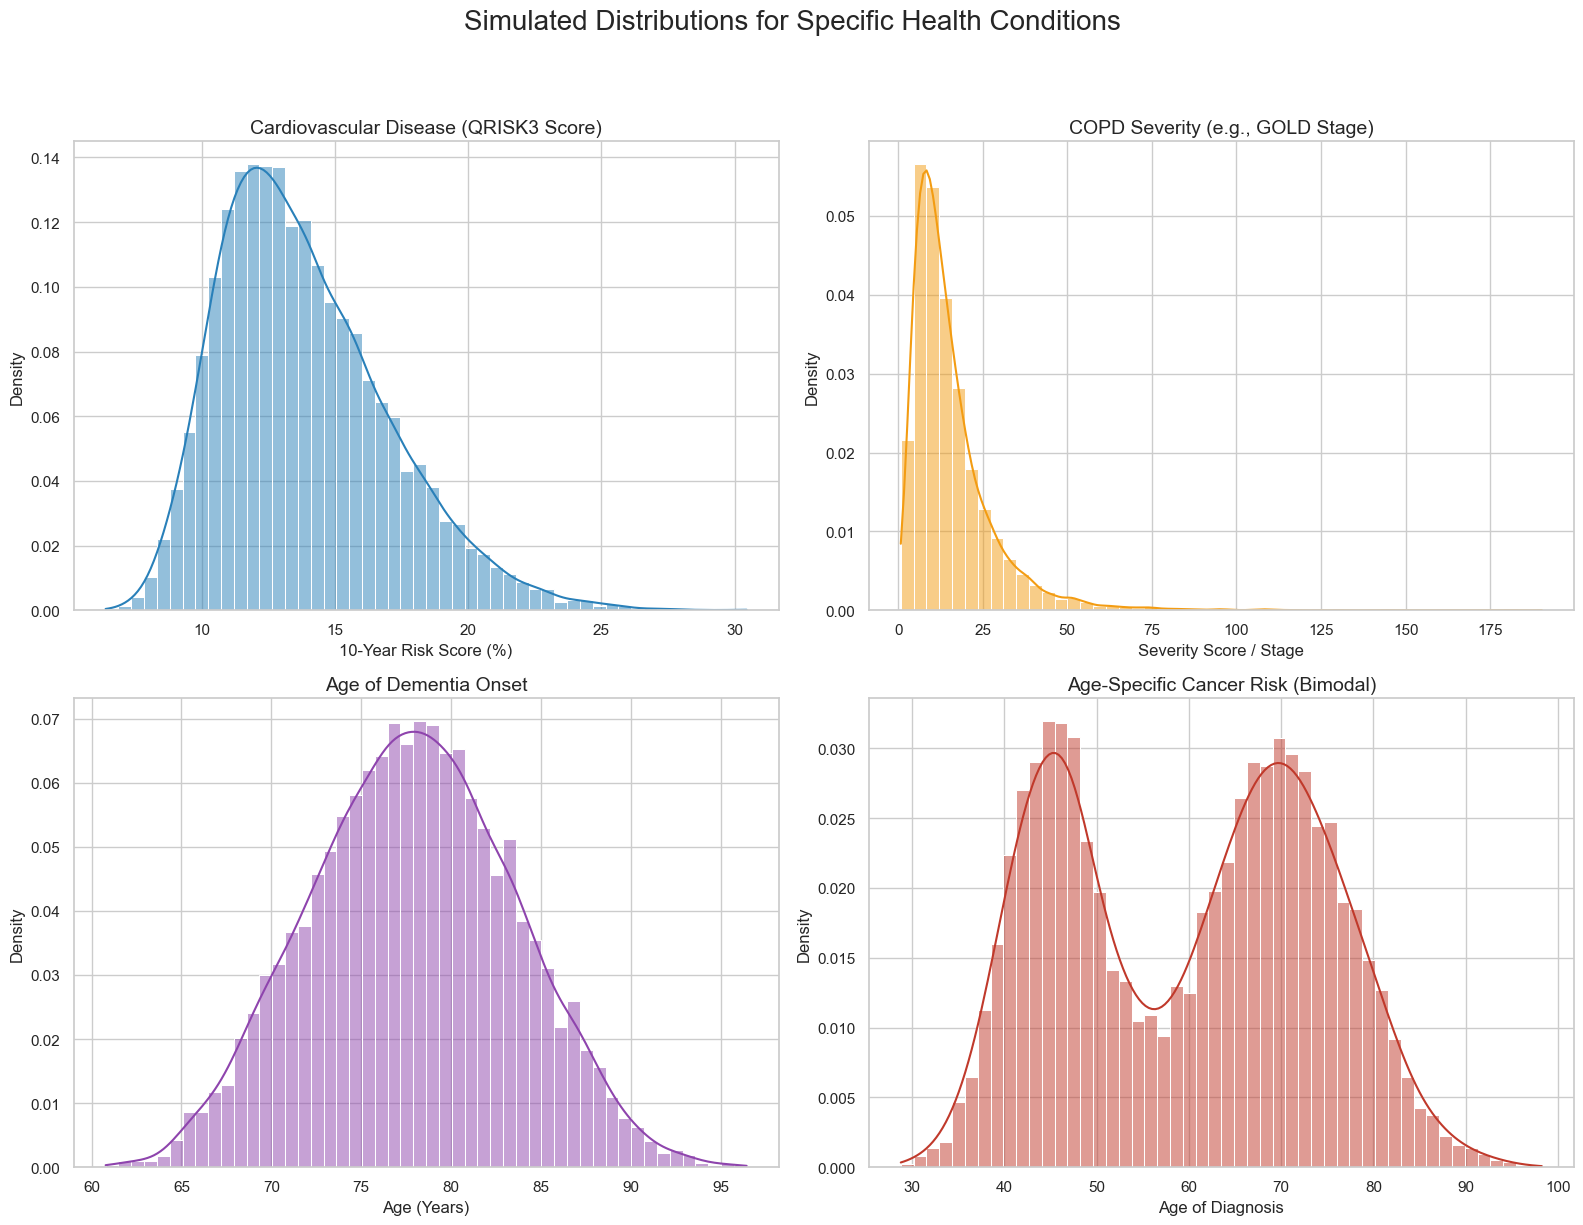

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the visual theme for the plots
sns.set_theme(style="whitegrid")

# Create a 2x2 grid for our plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Simulated Distributions for Specific Health Conditions', fontsize=20, y=1.02)

# --- 1. Cardiovascular Disease (CVD) Risk ---

a_skew = 4  # Skewness parameter
cvd_risk = stats.skewnorm.rvs(a_skew, loc=10, scale=5, size=10000, random_state=42)
sns.histplot(cvd_risk, bins=50, kde=True, stat="density", ax=axes[0, 0], color='#2980b9')
axes[0, 0].set_title('Cardiovascular Disease (QRISK3 Score)', fontsize=14)
axes[0, 0].set_xlabel('10-Year Risk Score (%)')
axes[0, 0].set_ylabel('Density')

# --- 2. COPD Severity ---

s = 0.7  # Shape parameter
copd_severity = stats.lognorm.rvs(s, scale=np.exp(2.5), size=10000, random_state=42)
sns.histplot(copd_severity, bins=50, kde=True, stat="density", ax=axes[0, 1], color='#f39c12')
axes[0, 1].set_title('COPD Severity (e.g., GOLD Stage)', fontsize=14)
axes[0, 1].set_xlabel('Severity Score / Stage')
axes[0, 1].set_ylabel('Density')

# --- 3. Dementia Onset Probability by Age ---

c = 3.5  # Shape parameter
dementia_age = stats.weibull_min.rvs(c, loc=60, scale=20, size=10000, random_state=42)
sns.histplot(dementia_age, bins=50, kde=True, stat="density", ax=axes[1, 0], color='#8e44ad')
axes[1, 0].set_title('Age of Dementia Onset', fontsize=14)
axes[1, 0].set_xlabel('Age (Years)')
axes[1, 0].set_ylabel('Density')

# --- 4. Cancer Risk by Age ---

np.random.seed(42)
peak1 = np.random.normal(45, 5, 4000)  # First peak (e.g., certain leukaemias)
peak2 = np.random.normal(70, 8, 6000)  # Second peak (e.g., lung, colorectal)
cancer_age = np.concatenate([peak1, peak2])
sns.histplot(cancer_age, bins=50, kde=True, stat="density", ax=axes[1, 1], color='#c0392b')
axes[1, 1].set_title('Age-Specific Cancer Risk (Bimodal)', fontsize=14)
axes[1, 1].set_xlabel('Age of Diagnosis')
axes[1, 1].set_ylabel('Density')

# Display the final figure with all subplots, ensuring a clean layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Visualizing Condition-Specific Distributions

Below, we will generate and plot the distributions for four key conditions in a single grid to allow for easy comparison. Each plot is designed to reflect the likely real-world distribution of the condition.

#### 1. Cardiovascular Disease (CVD) Risk  
**Description:** Slightly right-skewed Normal distribution. This represents a risk score like QRISK3, where most people have low-to-average risk, with a tail of high-risk individuals.  
**Diagnostics:** ECG, Echocardiogram (ECHO), Cardiac CT/MRI.

#### 2. COPD Severity  
**Description:** Lognormal distribution, as most patients are in mild/moderate stages. This differentiates the large group of mild/moderate cases from the smaller, high-need group with severe disease.  
**Diagnostics:** Chest X-ray, CT Thorax, Spirometry.

#### 3. Dementia Onset Probability by Age  
**Description:** Weibull distribution, as risk rises sharply in old age. This helps map demand for memory clinics and neuroimaging, accounting for the undiagnosed burden in older, rural populations.  
**Diagnostics:** Brain MRI, CT, SPECT.

#### 4. Cancer Risk by Age  
**Description:** Bimodal, mixing two normal distributions for early and late-onset cancers. This enables targeted screening and staging pathway planning.  
**Diagnostics:** CT, MRI, PET, Mammography, Biopsy.

---


## Conclusion

Different conditions have fundamentally different distributional 'fingerprints'. A right-skewed model might work for CVD risk, while a bimodal model is needed for certain cancers. 

Recognizing this diversity is the first step toward building more accurate, nuanced models for diagnostic demand. The next crucial step is to understand how these base distributions are affected by the characteristics of the underlying population.

In the next notebook, we'll explore how to modify these PDFs based on demographic factors like **age and deprivation**.